# Principal Curve Examples with WKM

This notebook demonstrates the use of the WKM (Wasserstein K-Means) algorithm for fitting principal curves with different constraints:
1. **Bounded Length**: Principal curves with length constraints
2. **Bounded Curvature**: Principal curves with curvature penalties

The examples use a step-shaped 2D dataset with added noise to showcase how different constraints affect the resulting principal curves.

## Import Required Libraries

Import all necessary libraries for data generation, principal curve fitting, and visualization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle
from cycler import cycler
import importlib

import sys
import os
# Add the parent directory to Python path for importing wkm
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
import wkm

# Set up plotting parameters
color_cycle = ['#E7D046', '#1965B0', '#DC050C', '#F1932D', '#4EB265', '#F6C141'] 
plt.rcParams['text.usetex'] = True
cc = cycler('color', color_cycle)

print("Libraries imported successfully!")

## Generate Step-Shaped Dataset

Create a 2D step-shaped curve with added Gaussian noise.

In [7]:
def rho_step_2d(n):
    """Generate a 2D step-shaped curve with n points."""
    third = int(n/3)
    t = np.concatenate([np.linspace(-1, 0, third), np.zeros(n - 2 * third), np.linspace(0, 1, third)])
    s = np.concatenate([np.zeros(third), np.linspace(0, 1, n - 2 * third), np.ones(third)])
    p = np.vstack([t, s]).T
    return p

# Parameters
d = 2
n = 60
np.random.seed(1)
noise_var = 0.01

# Generate clean step curve
p = rho_step_2d(n)

# Add noise to create the dataset
mean = [0 for i in range(d)]
cov = noise_var * np.eye(d)
y = np.vstack([p[i,:] + np.random.multivariate_normal(mean, np.random.random(d) * cov, size=1) for i in range(n)])

print(f"Generated dataset with {n} points in {d}D")
print(f"Noise variance: {noise_var}")
print(f"Dataset shape: {y.shape}")

Generated dataset with 60 points in 2D
Noise variance: 0.01
Dataset shape: (60, 2)


Create PCA projections

In [8]:
# Compute PCA for initialization
pca = PCA(n_components=1)
f = pca.fit_transform(y)
x_pca = pca.inverse_transform(f)
order = np.argsort(f[:,0])
x_pca = x_pca[order]

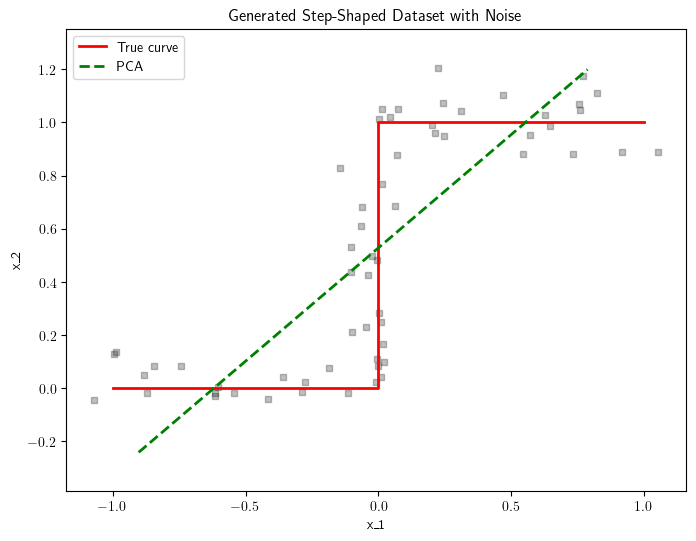

In [9]:

# Visualize the generated data
fig, ax = plt.subplots(figsize=[8, 6])
ax.scatter(x=y[:,0], y=y[:,1], s=13, marker='s', color='black', alpha=.25)
ax.plot(p[:,0], p[:,1], 'r-', linewidth=2, label='True curve')
ax.plot(x_pca[:,0], x_pca[:,1], 'g--', linewidth=2, label='PCA')
ax.axis('equal')
ax.legend()
ax.set_title('Generated Step-Shaped Dataset with Noise')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.show()

## Principal Curves with Bounded Length

Fit principal curves with different length constraints. The `length` parameter controls how much the curve can deviate from a straight line.

In [10]:
# Bounded length experiment
importlib.reload(wkm)  # Refresh the wkm library
m = n
x_list_length = []

# Parameters for bounded length
parameter_length = [0.1, 0.15, 0.2]

print("Fitting principal curves with bounded length...")
for i, B in enumerate(parameter_length):
    print(f"  Fitting curve {i+1}/{len(parameter_length)} with B = {B}")    
    # Create proper rectangular transport matrix when m < n
    if m < n:
        # Random initialization for rectangular matrix
        pi0_init = np.random.random([m, n])
        pi0_init = pi0_init / pi0_init.sum(axis=0)  # Normalize columns
        pi0_init = pi0_init / n  # Make it a proper transport matrix
    else:
        pi0_init = np.eye(m) / m
    x, pi, exy_series = wkm.fit(y, m, 'length', x0=x_pca[:m], pi0=pi0_init, 
                               epochs=5, verbose=False, length=B)
    x_list_length.append(x)

print("Bounded length curves fitted!")

Fitting principal curves with bounded length...
  Fitting curve 1/3 with B = 0.1
fit length
B 0.1
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [2.69790213e-10]
barycenter condition violated [-0.27088311 -0.31939768]
B 0.1 length [2.69790213e-10]
barycenter condition violated [-0.27088311 -0.31939768]
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [9.48024632e-12]
barycenter condition violated [-0.25765973 -0.30380372]
B 0.1 length [9.48024632e-12]
barycenter condition violated [-0.25765973 -0.30380372]
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [3.91302646e-12]
barycenter condition violated [-0.22319091 -0.26210173]
B 0.1 length [3.91302646e-12]
barycenter condition violated [-0.22319091 -0.26210173]
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [3.91300884e-12]
barycenter condition violated [-0.22

Convex Order version.

In [12]:
# Bounded length mtg experiment
importlib.reload(wkm)  # Refresh the wkm library
m = n
x_list_length_mtg = []

# Parameters for bounded length
parameter_length = [0.1, 0.15, 0.2]

print("Fitting principal curves with bounded length mtg...")
for i, B in enumerate(parameter_length):
    print(f"  Fitting curve {i+1}/{len(parameter_length)} with B = {B}")
    
    # Create proper rectangular transport matrix when m < n
    if m < n:
        # Random initialization for rectangular matrix
        pi0_init = np.random.random([m, n])
        pi0_init = pi0_init / pi0_init.sum(axis=0)  # Normalize columns
        pi0_init = pi0_init / n  # Make it a proper transport matrix
    else:
        pi0_init = np.eye(m) / m
    
    x, pi, exy_series = wkm.fit(y, m, 'length_mtg', x0=x_pca[:m], pi0=pi0_init, 
                               epochs=5, verbose=False, length=B)
    x_list_length_mtg.append(x)

print("Bounded length mtg curves fitted!")

Fitting principal curves with bounded length mtg...
  Fitting curve 1/3 with B = 0.1
fit length_mtg
B 0.1
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [2.69790213e-10]
barycenter condition violated [-0.27088311 -0.31939768]
B 0.1 length [2.69790213e-10]
barycenter condition violated [-0.27088311 -0.31939768]
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [9.48024632e-12]
barycenter condition violated [-0.25765973 -0.30380372]
B 0.1 length [9.48024632e-12]
barycenter condition violated [-0.25765973 -0.30380372]
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [3.91302646e-12]
barycenter condition violated [-0.22319091 -0.26210173]
B 0.1 length [3.91302646e-12]
barycenter condition violated [-0.22319091 -0.26210173]
update_xh: B =  0.1
qp_length: B =  0.1
update_xh: B =  0.1
qp_length: B =  0.1
B 0.1 length [3.91300884e-12]
barycenter condition violate

Dump/load.

In [ ]:

# Save results to pickle files (uncomment to use)
dump_results = False
load_results = False
length_path = '../model_dump/bounded_length_mtg_step_x_list.pickle'

if dump_results:
    # Save bounded length results
    length_data = {'x_list': x_list_length, 'parameter': parameter_length}
    with open(length_path, 'wb') as file:
        pickle.dump(length_data, file)
    print(f'Bounded length results saved to {length_path}')

if load_results:
    length_data = {'x_list': x_list_length, 'parameter': parameter_length}
    with open(_path, 'rb') as file:
        length_data = pickle.load(file)
        x_list_length = length_data['x_list']
        parameter_length = length_data['parameter']
    print('x_list and parameter loaded from ' + _path)

Plot K-Dominance.

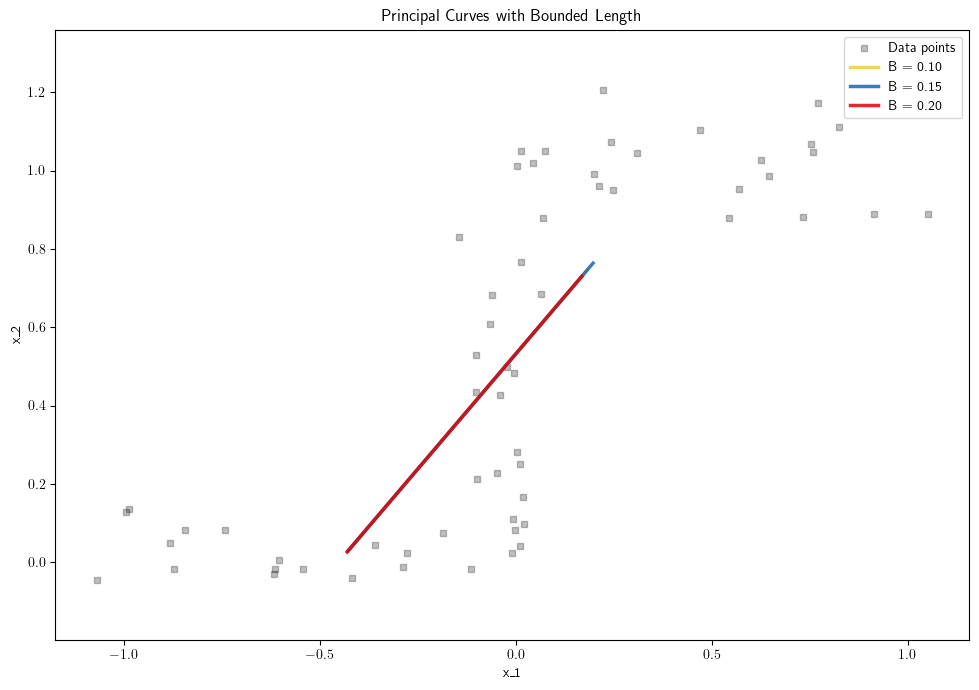

In [11]:
# Plot bounded length results
fig, ax = plt.subplots(figsize=[10, 7])
ax.axis('equal')
ax.set_prop_cycle(cc)

# Plot data points
ax.scatter(x=y[:,0], y=y[:,1], s=13, marker='s', color='black', alpha=.25)

# Plot curves with different length constraints
for x in x_list_length:
    ax.plot(x[:,0], x[:,1], linewidth=2.5, alpha=.85)

# Create legend
legend_labels = ['Data points'] + [f'B = {p:0.2f}' for p in parameter_length]
ax.legend(legend_labels)
ax.set_title('Principal Curves with Bounded Length')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.tight_layout()
plt.show()


Plot Convex Order.

In [ ]:
# Plot bounded length mtg results
fig, ax = plt.subplots(figsize=[10, 7])
ax.axis('equal')
ax.set_prop_cycle(cc)

# Plot data points
ax.scatter(x=y[:,0], y=y[:,1], s=13, marker='s', color='black', alpha=.25)

# Plot curves with different length constraints
for x in x_list_length_mtg:
    ax.plot(x[:,0], x[:,1], linewidth=2.5, alpha=.85)

# Create legend
legend_labels = ['Data points'] + [f'B = {p:0.2f}' for p in parameter_length]
ax.legend(legend_labels)
ax.set_title('Principal Curves with Bounded Length')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.tight_layout()
plt.show()

## Principal Curves with Bounded Curvature

Fit principal curves with curvature penalties. The `curvature_penalty` parameter controls how smooth the resulting curve should be.

In [ ]:
# Bounded curvature experiment
importlib.reload(wkm)  # Refresh the wkm library
m = n
x_list_curvature = [x_pca]  # Include PCA as baseline

# Parameters for bounded curvature
parameter_curvature = [1e-4, 1e-5]

print("Fitting principal curves with bounded curvature...")
for i, penalty in enumerate(parameter_curvature):
    print(f"  Fitting curve {i+1}/{len(parameter_curvature)} with penalty = {penalty}")
    
    # Create proper rectangular transport matrix when m < n
    if m < n:
        # Option 1: Random initialization
        pi0_init = np.random.random([m, n])
        pi0_init = pi0_init / pi0_init.sum(axis=0)  # Normalize columns to sum to 1
        pi0_init = pi0_init / n  # Make it a proper transport matrix
    else:
        pi0_init = np.eye(m) / m
    x, pi, exy_series = wkm.fit(y, m, 'curvature', x0=x_pca[:m], pi0=pi0_init, 
                               epochs=5000, verbose=False, curvature_penalty=penalty)
    x_list_curvature.append(x)

print("Bounded curvature curves fitted!")

Convex order.

In [ ]:
# Bounded curvature experiment - mtg
importlib.reload(wkm)  # Refresh the wkm library
m = n# * 9 // 10
x_list_curvature_mtg = [x_pca]  # Include PCA as baseline

print("Fitting principal curves with bounded curvature...")
for i, penalty in enumerate(parameter_curvature):
    print(f"  Fitting curve {i+1}/{len(parameter_curvature)} with penalty = {penalty}")
    
    # Create proper rectangular transport matrix when m < n
    if m < n:
        # Option 1: Random initialization
        pi0_init = np.random.random([m, n])
        pi0_init = pi0_init / pi0_init.sum(axis=0)  # Normalize columns to sum to 1
        pi0_init = pi0_init / n  # Make it a proper transport matrix
        #assert np.allclose(pi0_init.sum(axis=0), np.ones(n)), "Columns do not sum to 1"
        #assert np.allclose(pi0_init.sum(axis=1) <= 1), "Rows sum to more than 1"
    else:
        pi0_init = np.eye(m) / m
    
    x, pi, exy_series = wkm.fit(y, m, 'curvature_mtg', x0=x_pca[:m], pi0=pi0_init, 
                               epochs=5000, verbose=False, curvature_penalty=penalty)
    x_list_curvature_mtg.append(x)

print("Bounded curvature curves fitted!")

## Visualize Bounded Curvature Results

Compare the effects of different curvature penalties on the fitted principal curves.

In [ ]:
# Plot bounded curvature results  
fig, ax = plt.subplots(figsize=[10, 7])
ax.axis('equal')
ax.set_prop_cycle(cc)

# Plot data points
ax.scatter(x=y[:,0], y=y[:,1], s=13, marker='s', color='black', alpha=.25)
# Plot curves with different curvature penalties
for x in x_list_curvature:
    ax.plot(x[:,0], x[:,1], linewidth=2.5, alpha=.85)


# Create legend
legend_labels = ['Data points', 'PCA'] + [f'lamb = {p:.0E}' for p in parameter_curvature]
ax.legend(legend_labels)
ax.set_title('Principal Curves with Bounded Curvature')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.tight_layout()
plt.show()

In [ ]:
# Plot bounded curvature results  
fig, ax = plt.subplots(figsize=[10, 7])
ax.axis('equal')
ax.set_prop_cycle(cc)

# Plot data points
ax.scatter(x=y[:,0], y=y[:,1], s=13, marker='s', color='black', alpha=.25)
# Plot curves with different curvature penalties
for x in x_list_curvature_mtg:
    ax.plot(x[:,0], x[:,1], linewidth=2.5, alpha=.85)


# Create legend
legend_labels = ['Data points', 'PCA'] + [f'lamb = {p:.0E}' for p in parameter_curvature]
ax.legend(legend_labels)
ax.set_title('Principal Curves with Bounded Curvature')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.tight_layout()
plt.show()

## Side-by-Side Comparison

Compare both methods (bounded length vs. bounded curvature) in a single visualization.

In [ ]:
# Create side-by-side comparison
fig, ax = plt.subplots(1, 2, figsize=[15, 6])

# Left plot: Bounded Length
ax[0].axis('equal')
ax[0].set_prop_cycle(cc)
ax[0].scatter(x=y[:,0], y=y[:,1], s=13, marker='s', color='black', alpha=.25)
for x in x_list_length:
    ax[0].plot(x[:,0], x[:,1], linewidth=2.5, alpha=.85)
ax[0].legend(['Data points'] + [f'B = {p:0.2f}' for p in parameter_length])
ax[0].set_title('Bounded Length')
ax[0].set_xlabel('x₁')
ax[0].set_ylabel('x₂')

# Right plot: Bounded Curvature
ax[1].axis('equal')
ax[1].set_prop_cycle(cc)
ax[1].scatter(x=y[:,0], y=y[:,1], s=13, marker='s', color='black', alpha=.25)
for x in x_list_curvature:
    ax[1].plot(x[:,0], x[:,1], linewidth=2.5, alpha=.85)
ax[1].legend(['Data points', 'PCA'] + [f'λ = {p:.0E}' for p in parameter_curvature])
ax[1].set_title('Bounded Curvature')
ax[1].set_xlabel('x₁')
ax[1].set_ylabel('x₂')

plt.tight_layout()
plt.show()

## Save and Load Results (Optional)

The following cells demonstrate how to save and load the computed results for future use.

In [ ]:
# Save results to pickle files (uncomment to use)
save_results = False

if save_results:
    # Save bounded curvature results
    curvature_path = '../model_dump/bounded_curvature_step_x_list.pickle'
    curvature_data = {'x_list': x_list_curvature, 'parameter': parameter_curvature}
    with open(curvature_path, 'wb') as file:
        pickle.dump(curvature_data, file)
    print(f'Bounded curvature results saved to {curvature_path}')

print("Results can be saved by setting save_results = True")

## Summary and Insights

This notebook demonstrates two different approaches to fitting principal curves:

### Bounded Length Approach
- Controls the total arc length of the curve
- Lower `B` values result in straighter curves
- Higher `B` values allow more flexibility in curve shape

### Bounded Curvature Approach  
- Uses curvature penalties to enforce smoothness
- Lower `λ` values (less penalty) allow sharper turns
- Higher `λ` values (more penalty) enforce smoother curves

### Key Observations
1. Both methods can capture the underlying step structure in the data
2. The bounded length method tends to create piecewise linear approximations
3. The bounded curvature method produces smoother curves
4. Parameter tuning is crucial for balancing fidelity to data vs. regularity constraints

The WKM algorithm provides a flexible framework for optimal transport-based principal curve fitting with various geometric constraints.